In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
# index_col parameter required as the csv has an Id field that shouldn't be considered a feature 
train = pd.read_csv("../data/train.csv",index_col="Id")
test = pd.read_csv("../data/test.csv",index_col="Id")

In [16]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [20]:
#test.columns

In [24]:
len(train)

1460

In [22]:
# Get the # of nulls in each column
def countNull(df):
    nullDict = dict()
    for column in df:
        nullDict[column]= sum(pd.isnull(df[column]))
    return nullDict  

In [35]:
#countNull(train)

In [32]:
# Following columns have too many nulls so lets drop them
train = train.drop(['Alley'],axis=1)
train = train.drop(['FireplaceQu'],axis=1)
train = train.drop(['MiscFeature'],axis=1)
train = train.drop(['PoolQC'],axis=1)

test = test.drop(['Alley'],axis=1)
test = test.drop(['FireplaceQu'],axis=1)
test = test.drop(['MiscFeature'],axis=1)
test = test.drop(['PoolQC'],axis=1)

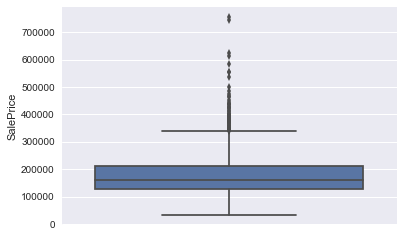

In [40]:
sns.boxplot(y=train['SalePrice'])

In [112]:
train[(train.SalePrice > 700000)][['SalePrice', 'OverallQual', 
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
692,755000,10,4316,3,2444,3,1994
1183,745000,10,4476,3,2396,3,1996


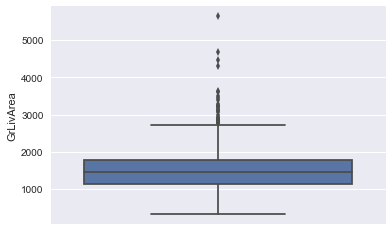

In [54]:
sns.boxplot(y=train['GrLivArea'])

In [114]:
train[(train.GrLivArea > 4000)][['SalePrice', 'OverallQual', 
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
524,184750,10,4676,3,3138,3,2007
692,755000,10,4316,3,2444,3,1994
1183,745000,10,4476,3,2396,3,1996
1299,160000,10,5642,2,6110,2,2008


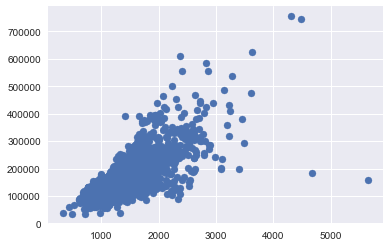

In [58]:
plt.scatter(x=train['GrLivArea'],y=train['SalePrice'])

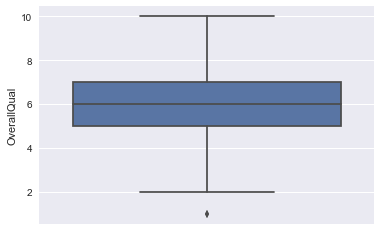

In [59]:
sns.boxplot(y=train['OverallQual'])

In [60]:
train[(train.OverallQual < 2)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
376,30,RL,NaN,10020,Pave,IR1,Low,AllPub,Inside,Sev,...,0,0,0,NaN,0,3,2009,WD,Normal,61000
534,20,RL,50.0,5000,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,NaN,0,1,2007,WD,Normal,39300


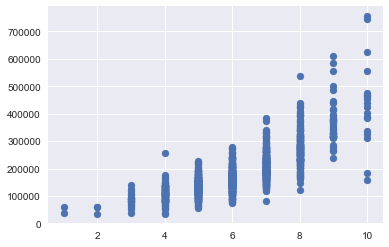

In [61]:
plt.scatter(x=train['OverallQual'],y=train['SalePrice'])

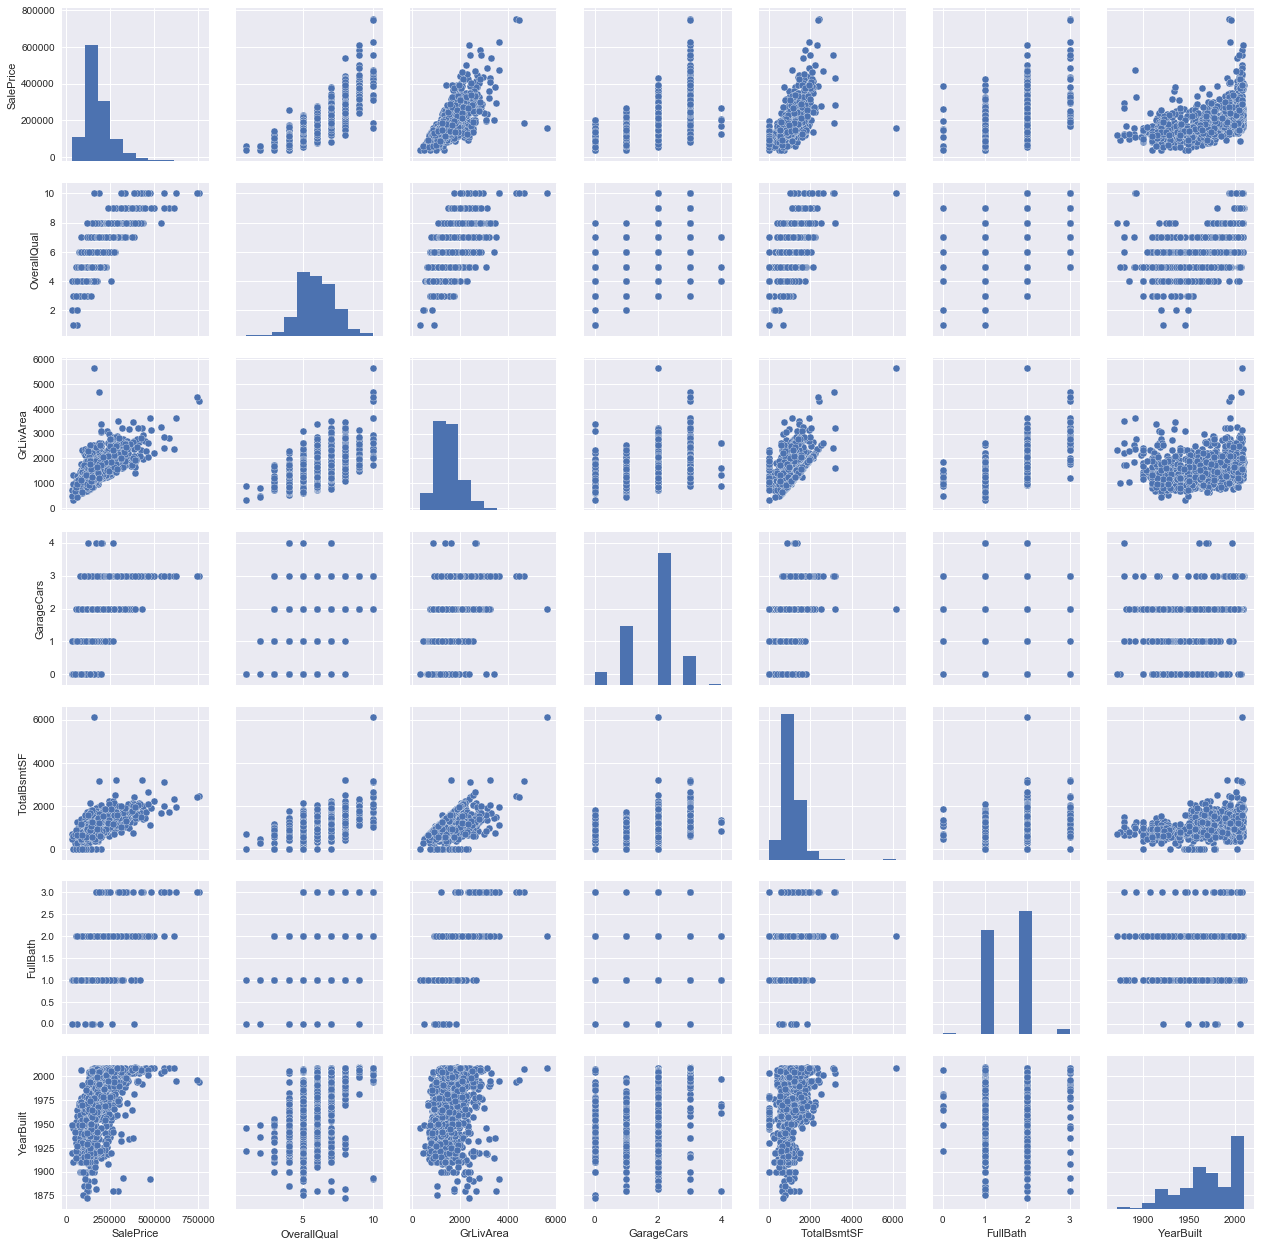

In [72]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [91]:
train.sort_values(by='TotalBsmtSF',ascending=False)[['TotalBsmtSF','SalePrice']].head()


,TotalBsmtSF,SalePrice
Id,,
1299,6110,160000
333,3206,284000
497,3200,430000
524,3138,184750
441,3094,555000


In [92]:
train.sort_values(by='GrLivArea',ascending=False)[['GrLivArea','SalePrice']].head()

,GrLivArea,SalePrice
Id,,
1299,5642,160000
524,4676,184750
1183,4476,745000
692,4316,755000
1170,3627,625000


In [105]:
# oldest houses with SalePrice > 200000
train.sort_values(by='YearBuilt')[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][(train.SalePrice > 200000)].head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
748,265979,7,2640,4,1240,1,1880
305,295000,7,3493,3,1470,3,1880
186,475000,10,3608,3,1107,2,1892
584,325000,10,2775,2,1237,3,1893
849,240000,6,2358,2,907,3,1908


In [109]:
train.sort_values(by='FullBath')[['SalePrice', 
                                  'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:20]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
189,153337,5,1224,2,1086,0,1979
598,194201,7,1402,3,1258,0,2006
635,144000,6,1056,2,1056,0,1980
54,385000,9,1842,3,1842,0,1981
376,61000,1,904,0,683,0,1922
1214,145000,4,960,1,648,0,1965
1164,108959,4,1258,2,1198,0,1969
1271,260000,7,1524,2,1332,0,1979
917,35311,2,480,1,480,0,1949


# Relationship with categorical features

In [134]:
def drawCategoricalFeatureRelationship(feature):
    data = pd.concat([df_train['SalePrice'], df_train[feature]], axis=1)
    f, ax = plt.subplots(figsize=(20, 10))
    fig = sns.boxplot(x=feature, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);
    plt.rc('xtick', labelsize=50) 
    plt.rc('ytick', labelsize=50) 
    plt.xticks(rotation=90);

Neighbourhood would natually affect the sales price, lets find the outliers for neighbourhood, will only look at neighbourhoods that show outliers in the boxplot & see if there is a good reason for those ouliers, otherwise we can drop those from the dataset

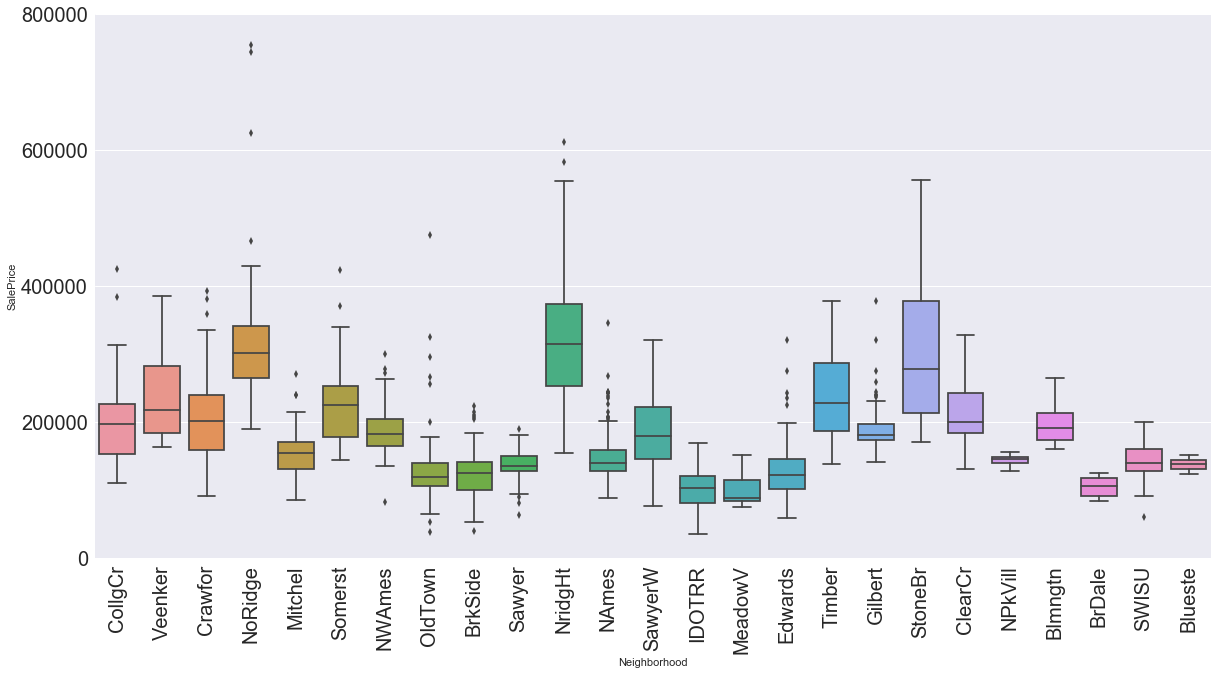

In [135]:
#box plot MasVnrType/saleprice
drawCategoricalFeatureRelationship('Neighborhood')

In [157]:
train[(train.Neighborhood == 'CollgCr')].sort_values(by=['SalePrice'],ascending=False)[
    ['SalePrice', 'OverallQual',
    'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:10]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
1143,424870,8,2828,3,1466,3,2006
113,383970,7,2696,3,1264,2,2007
611,313000,9,2153,3,1440,2,2000
306,305900,8,2000,3,2000,2,2004
479,297000,8,1718,3,1705,2,2007
1317,295493,8,1630,3,1622,2,2008
1038,287000,8,2263,2,1055,2,2001
684,285000,9,1668,3,1626,2,2002
14,279500,7,1494,3,1494,2,2006


Ids 1143 & 113 seem to have higher sales price due to their GrLivArea but there seems to be comparable areas houses that were sold for much lower price. 
<p>So lets have <b> 1143 & 113 </b> as outliers for <b> 'CollgCr' </b> neighbourhood

In [151]:

train[(train.Neighborhood == 'Crawfor')].sort_values(by='SalePrice',ascending=False)[['SalePrice', 'OverallQual',
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:20]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
1182,392500,8,1652,2,1600,2,2008
1269,381000,8,3447,3,728,3,1935
609,359100,8,3194,2,965,2,1934
1311,335000,7,1902,2,1902,2,1959
191,315000,8,2727,2,853,2,1932
219,311500,7,1954,2,798,1,1939
504,289000,7,1801,2,1501,2,1959
1406,275000,8,1646,2,1594,2,2004
1458,266500,7,2340,1,1152,2,1941


Id 1182 seem to have higher sales price due recent YearBuilt but there seems to be comparable areas houses that were sold for much lower price. 
<p>So lets have <b> 1182 </b> as outliers for <b> 'Crawfor' </b> neighbourhood. The other 2 high values 1269 & 609 seem to have unusually high GrLiv area so those might be ok

In [169]:
train[(train.Neighborhood == 'NoRidge')].sort_values(by='SalePrice', ascending=False)[['SalePrice', 'OverallQual',
                                   'GrLivArea', '1stFlrSF','TotRmsAbvGrd','GarageCars', 'YearRemodAdd','BsmtFinSF1',
                                    'TotalBsmtSF', 'FullBath', 'YearBuilt']][:10]

,SalePrice,OverallQual,GrLivArea,1stFlrSF,TotRmsAbvGrd,GarageCars,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,,,,,
692,755000,10,4316,2444,10,3,1995,1455,2444,3,1994
1183,745000,10,4476,2411,10,3,1996,2096,2396,3,1996
1170,625000,10,3627,1831,10,3,1996,1387,1930,3,1995
1374,466500,10,2633,2633,8,3,2002,1282,2633,2,2001
497,430000,8,3228,3228,10,2,1993,1231,3200,3,1992
1354,410000,8,3238,2053,9,3,1996,816,2033,2,1995
232,403000,8,2794,1490,9,3,1996,689,1462,2,1995
662,402000,8,2448,1686,8,3,2005,1361,1629,2,1994
655,350000,8,2113,2113,7,3,1995,1696,2109,2,1995


These seem ok as top 4 has OverallQual of 10 & particularly top 3 are really large house

In [155]:
train[(train.Neighborhood == 'Mitchel')].sort_values(by='SalePrice', ascending=False)[['SalePrice', 'OverallQual',
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:10]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
818,271000,8,1689,3,1568,2,2002
1009,240000,7,1710,2,1710,2,2004
47,239686,7,2149,2,1434,1,2003
392,215000,6,1961,2,804,2,2001
421,206300,7,1344,4,1344,2,1997
277,201000,7,1560,2,1560,2,2003
1139,196000,6,1567,2,1567,2,1977
455,188000,5,1728,2,1728,2,1976
187,173000,7,1217,2,1188,2,1990


These seem ok as top 2 have high OverallQual & GrLivArea combination

In [158]:
train[(train.Neighborhood == 'Somerst')].sort_values(by='SalePrice', ascending=False)[['SalePrice', 'OverallQual',
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:10]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
665,423000,8,2097,3,2077,1,2005
645,370878,9,1766,3,1766,2,2009
378,340000,8,2466,2,1580,3,2004
410,339750,8,2078,3,1034,2,2007
886,328900,9,1709,2,1698,2,1999
933,320000,9,1905,3,1905,2,2006
197,311872,7,1726,3,1726,2,2007
1443,310000,10,2007,3,1017,2,2008
7,307000,8,1694,2,1686,2,2004


665 seem to have unusually large value compared to other comparable houses. 
<p> lets drop <b> 665 </b> </p>

In [160]:
train[(train.Neighborhood == 'NWAmes')].sort_values(by='SalePrice')[['SalePrice', 'OverallQual',
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:10]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
633,82500,7,1411,2,1386,2,1977
1337,135000,5,1656,2,1656,2,1973
1004,136905,5,1680,2,1680,2,1976
702,140000,7,1164,2,1164,1,1969
1287,143000,6,1328,2,1328,1,1963
1081,145000,6,1258,2,1258,2,1971
612,148000,6,1032,2,1032,2,1978
859,152000,7,1370,2,1090,2,1976
644,152000,5,1620,2,780,2,1969


633 seem to have unusually low value compared to other comparable houses.

lets drop <b>633</b>

In [162]:
train[(train.Neighborhood == 'OldTown')].sort_values(by='SalePrice',ascending=False)[['SalePrice', 'OverallQual',
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:10]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
186,475000,10,3608,3,1107,2,1892
584,325000,10,2775,2,1237,3,1893
305,295000,7,3493,3,1470,3,1880
748,265979,7,2640,4,1240,1,1880
1329,256000,6,2792,2,1510,2,1920
184,200000,7,2082,2,1362,2,2003
315,178000,7,1641,2,728,1,1925
1077,170000,5,1466,2,796,2,1936
992,168000,8,1742,2,916,1,1882


Seems fine, the high prices are for OverallQual & GrLiveArea

In [164]:
train[(train.Neighborhood == 'BrkSide')].sort_values(by='SalePrice',ascending=False)[['SalePrice', 'OverallQual',
                                   'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']][:10]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
Id,,,,,,,
808,223500,5,1576,2,1324,1,1923
329,214500,6,2134,2,844,2,1916
547,210000,6,1635,2,1065,1,1923
1415,207000,6,1848,2,833,1,1923
276,205000,7,1548,2,952,2,1925
498,184000,7,1820,1,1026,2,1925
1264,180500,6,1824,2,764,1,1919
975,167500,7,2019,2,728,1,1910
443,162900,5,1573,2,1078,2,1930


<b> The top 4 seem like outliers but since the price diff doesn't seem to be too much lets leave them for now </b>